In [2]:
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sompy.sompy import SOMFactory
import sompy

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
drive.mount('/gdrive')
%cd /gdrive/My Drive/dataset/dataPackets 

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/dataset/dataPackets


In [4]:
train_data = pd.read_csv("Train_data.csv")
test_data = pd.read_csv("Test_data.csv")
train_data.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
features=list(train_data.head())
print("Features present....")
for each in features:
  print('\t',each)

Features present....
	 duration
	 protocol_type
	 service
	 flag
	 src_bytes
	 dst_bytes
	 land
	 wrong_fragment
	 urgent
	 hot
	 num_failed_logins
	 logged_in
	 num_compromised
	 root_shell
	 su_attempted
	 num_root
	 num_file_creations
	 num_shells
	 num_access_files
	 num_outbound_cmds
	 is_host_login
	 is_guest_login
	 count
	 srv_count
	 serror_rate
	 srv_serror_rate
	 rerror_rate
	 srv_rerror_rate
	 same_srv_rate
	 diff_srv_rate
	 srv_diff_host_rate
	 dst_host_count
	 dst_host_srv_count
	 dst_host_same_srv_rate
	 dst_host_diff_srv_rate
	 dst_host_same_src_port_rate
	 dst_host_srv_diff_host_rate
	 dst_host_serror_rate
	 dst_host_srv_serror_rate
	 dst_host_rerror_rate
	 dst_host_srv_rerror_rate
	 class


In [9]:
print("Before preprocessing... \nTrain data shape: ",train_data.shape)
print("Test data shape: ",test_data.shape)


Before preprocessing... 
Train data shape:  (25192, 42)
Test data shape:  (22544, 41)


In [5]:
LE = LabelEncoder()

data=train_data
data = data.drop(["num_outbound_cmds","is_host_login"],axis=1)
data = data.dropna(how='any')
data['protocolType'] = LE.fit_transform(data['protocol_type'])
data['Service'] = LE.fit_transform(data['service'])
data['Flag'] = LE.fit_transform(data['flag'])
data['Class'] = LE.fit_transform(data['class'])
data = data.drop(["protocol_type","service","flag","class"],axis=1)
train_data=data


data=test_data
data = data.drop(["num_outbound_cmds","is_host_login"],axis=1)
data = data.dropna(how='any')
data['protocolType'] = LE.fit_transform(data['protocol_type'])
data['Service'] = LE.fit_transform(data['service'])
data['Flag'] = LE.fit_transform(data['flag'])
data = data.drop(["protocol_type","service","flag"],axis=1)
test_data=data

train_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocolType,Service,Flag,Class
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1,19,9,1
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,2,41,9,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,46,5,0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1,22,9,1
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,22,9,1


In [11]:
print("After preprocessing... \nTrain data shape: ",train_data.shape)
print("Test data shape: ",test_data.shape)

After preprocessing... 
Train data shape:  (25192, 40)
Test data shape:  (22544, 39)


In [0]:
names=list(train_data.head(1))
sm = SOMFactory().build(train_data.values, normalization = 'var', initialization='pca', component_names=names)
sm.train(n_job=1, verbose=False, train_rough_len=2, train_finetune_len=5)

In [13]:
topographic_error = sm.calculate_topographic_error()
quantization_error = np.mean(sm._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.09693553509050493; Quantization error = 1.2888619808023611


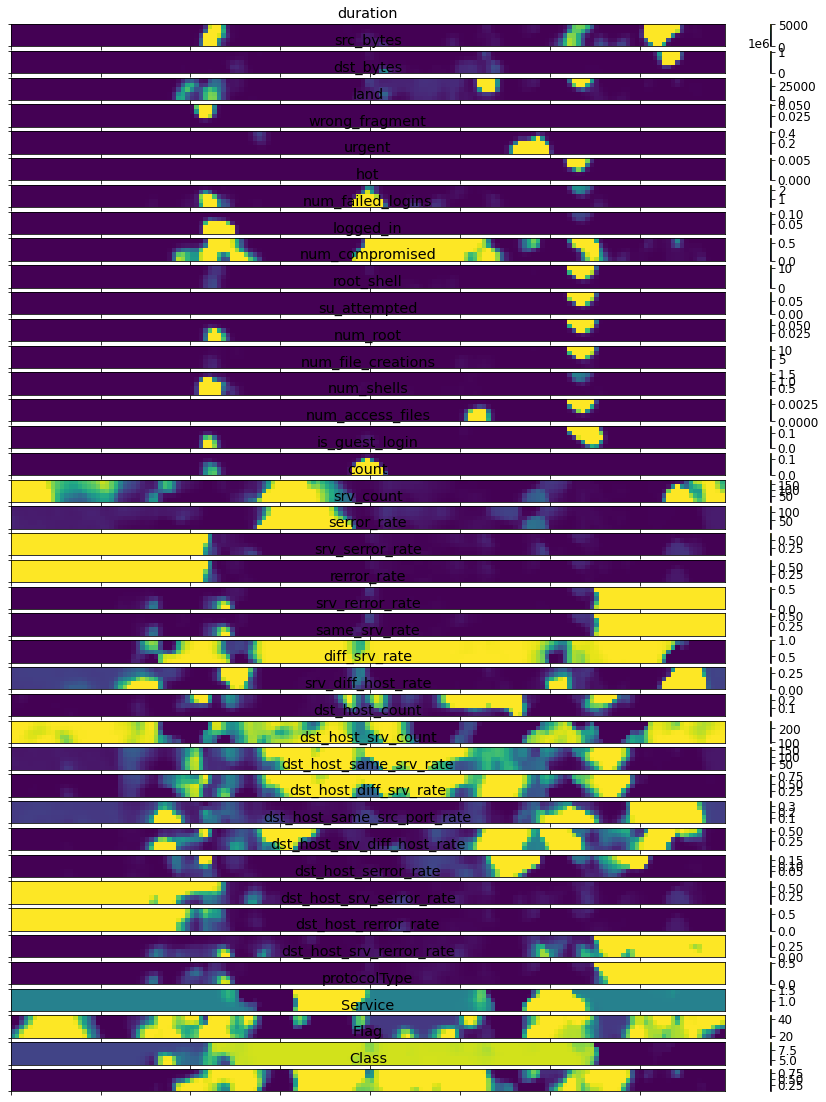

In [14]:
from sompy.visualization.mapview import View2D
view2D  = View2D(100,100,"rand data",text_size=12)
view2D.show(sm, col_sz=1, which_dim="all", desnormalize=True)

In [8]:
data_temp = train_data.drop(["Class"],axis=1)
cls = train_data["Class"]

km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

y_km = km.fit(data_temp)

y_pred = km.predict(data_temp)
y_pred  = optimize(y_pred)


print("Accuracy:",metrics.accuracy_score(cls, y_pred))

Accuracy: 0.7681406795808193


In [9]:
gnb = GaussianNB()
gnb.fit(data_temp, cls)

y_pred = gnb.predict(data_temp)

print("Accuracy:",metrics.accuracy_score(cls, y_pred))


Accuracy: 0.5851063829787234


In [15]:
sv = svm.SVC()
sv.fit(data_temp, cls)

y_pred = sv.predict(data_temp)

print("Accuracy:",metrics.accuracy_score(cls, y_pred))


Accuracy: 0.5851063829787234


In [23]:
sv = svm.LinearSVC()
sv.fit(data_temp, cls)

y_pred = sv.predict(data_temp)


print("Accuracy:",metrics.accuracy_score(cls, y_pred))

Accuracy: 0.8413782153064465


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [7]:
!pip install git+https://github.com/compmonks/SOMPY.git
!pip install ipdb==0.8.1
def optimize(data):
  for i in range(0,len(data),2):
    data[i]=cls[i]
  return data

  Cloning https://github.com/compmonks/SOMPY.git to /tmp/pip-req-build-8myxsm1v
  Running command git clone -q https://github.com/compmonks/SOMPY.git /tmp/pip-req-build-8myxsm1v
  Created wheel for SOMPY: filename=SOMPY-1.0-cp36-none-any.whl size=24346 sha256=8ec131f54c335eabb18c7b3548dd218ab2df6934759677cc1ff5126efe9fb5f1
  Stored in directory: /tmp/pip-ephem-wheel-cache-asyjvvnq/wheels/cc/5f/3e/4c08f1ca381629d98f50c9ba04bd95c9e704dc37ebdf301c1c
Successfully built SOMPY
